In [1]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages (1.2.0)
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import sklearn
import scipy
import sys
import os

### **Building a linear regressor**

**Introduction**<br>
Given two variables: X (an independent variable) & Y (a dependent variable), the goal of linear regression is a roughly approximate the underlying relationship between X & Y and to then use this relationship to be able to predict a Y value for any given X value.

This relationship is represented by a straight line passing through the data points of X & Y that tries to capture as closely as possible their relation with each other.

Linear regression can even be extended to handle more than 2 variables. The only difference here is that instead of a straight line in a 2D plane, we'll be working with a plane in case of 3D and a hyperplane in case of 4D and so on (this all depends on the number of variables we are dealing with).

**Simple Linear Regression**<br>
So for each `X` observation, we use the following formula to find its corresponding `y` value:<br>
`y` = a*`x` + b

As we pointed out, the relationship between X & Y is mapped with a straigh line in a simple 2D (x-y) plane. The a & b variables in this equation correspond to the slope & y-intercept of this line respectively.

These variables (a & b) are the ones we;re trying to find given a bunch of X & Y observations, they allow us to draw the target line we're looking for.

**Ordinary Least Squares (OLS)**<br>
There are many techniques for doing linear regression, OLS is one of them.

The way OLS works is that, it tries to find a line that minimizes the squared distnace between our data points and the target line we're trying to draw.<br>
We use the squared distance instead of just the regular distance between our points and line because we don't want positive errors to be compensated by the negative ones (i.e distance of points from above and under the line) so we just square them to focus on just the value of distance.

In summary, we estimate the coeficients `a` & `b` by minimizing the distance between our line & the data points, this loss is often called the _Sum of Squares._

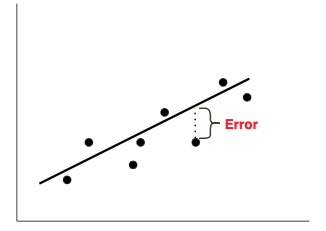

In [3]:
from IPython.display import Image
Image(filename='images/Linear_Regression_1.png')

### Coding a linear regressor

In [4]:
filename = 'data_files/Linear_regression_data.txt'
X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)
print(X)
print()
print(y)
print(f'We have {len(X)} (X, y) pairs in total.')

[4.94, -1.58, -4.45, -6.06, -1.22, -3.55, 0.36, -3.24, 1.31, 2.17, 2.94, -0.92, -0.91, 1.24, 1.56, -4.14, 3.75, 4.15, 0.33, 3.41, 2.27, 2.6, 1.06, 1.04, 2.74, -0.71, -2.75, 0.55, -3.45, 1.09, 2.47, -6.35, 1.83, -0.68, -3.83, -2.03, 3.13, 0.92, 4.02, 3.89, -1.81, 3.94, -2.0, 0.54, 0.78, 2.15, 2.55, -0.63, 1.06, -0.36]

[4.37, 1.7, 1.88, 0.56, 2.23, 1.53, 2.99, 0.48, 2.76, 3.99, 3.25, 2.27, 2.0, 4.75, 3.52, 1.39, 4.9, 4.44, 2.72, 4.59, 5.3, 3.43, 2.53, 3.69, 3.1, 2.72, 2.82, 3.53, 1.77, 4.61, 4.24, 1.0, 3.84, 2.42, 0.67, 1.07, 3.19, 4.21, 5.24, 3.94, 2.85, 4.86, 1.31, 3.99, 2.92, 4.72, 3.83, 2.58, 2.89, 1.99]
We have 50 (X, y) pairs in total.


As we said the goal here is to find a representation (i.e a line) that fits best our points in order to capture the underlying relationship of these points.

To do so, we are going to use some of our data points to build this representation and the rest will be used to test how accuracte our generated representation is.

This all together encapsulates the concept of machine learning, which is to capture an accurate representation of reality (in our case, the relationship between our data points).

Our representation is encapsulated in a model, which we train to be as accurate as possible.

In [5]:
num_training = int(0.8 * len(X))
num_test = len(X) - num_training
# We split our data by using 80% of the data points for training and the rest for testing

print(f'Amonut of training instances: {num_training}')
print(f'Amount of testing instances: {num_test}')

Amonut of training instances: 40
Amount of testing instances: 10


In [6]:
# Train data
X_train = np.array(X[:num_training]).reshape((num_training, 1)) # We need the input to our model to be in 2D, hence the reshape
y_train = np.array(y[:num_training])

# print(X_train)
print(X_train.shape)
print(y_train.shape)

(40, 1)
(40,)


In [7]:
# Test data
X_test = np.array(X[num_training:]).reshape((num_test, 1))
y_test = np.array(y[num_training:])

print(X_test.shape)
print(y_test.shape)

(10, 1)
(10,)


In [8]:
from sklearn import linear_model

# Create linear regression object
linear_regressor = linear_model.LinearRegression()

# Train the model using the training sets
linear_regressor.fit(X_train, y_train)

LinearRegression()

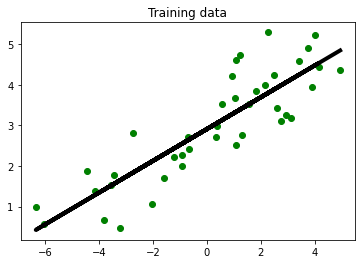

In [9]:
# Now that our model has been fit to our data, it's time to see what representation did it capture from our training data.
y_train_pred = linear_regressor.predict(X_train)

# Visualize
plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training data')
plt.show()

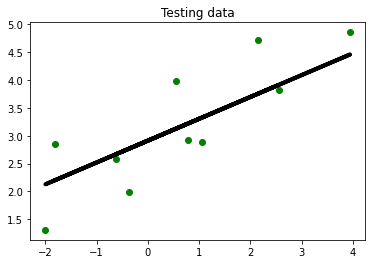

In [10]:
# Now let's test our model on new X values and see if it will map them correctly
y_test_pred = linear_regressor.predict(X_test)

# Visualize
plt.figure()
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title('Testing data')
plt.show()

### Check on model accuracy measurments

We've visualized what the representation deducted by our model looks like, but let's get a bit more accurate with numbers.

In [11]:
import sklearn.metrics as sm
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score = ", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error =  0.54
Mean squared error =  0.38
Median absolute error =  0.54
Explained variance score =  0.68
R2 score =  0.68


An R2 score near 1 means that the model is able to predict the data very well. 

A good rule of thumb is to make sure the mean squared error is low and the explained variance score is high.

- **Mean absolute error**: This is the average of absolute errors of all data ponits in the given dataset.
- **Mean squared error**: This is the average of the squares of the errors of all the data points in the given dataset.
- **Median absolute error**: This is the median of all errors in the given dataset. It is not affect by outlisers, so a single bad points doesn't skew the entire metric, as opposed to the mean metric.
- **Explained variance score**: This score measure how well our model can account for the variation inour dataset. A score of 1.0 indicates a perfect model.
- **R2 score**: Yhis score refers to the coefficient of determination which tells us how well the unknown sample will be predicte diby our model. The best possible score is 1.0, but the score can be negative as well.

### Achieving model persistency by saving our model


In addition to building our model, we can also save it for future use. This allows us to preserve the weights we've generated from training to use in future predictions.

In [12]:
# What we're doing here is basically saving our model in a `pickle` format as a file of its own
import pickle
output_model_file = "first_linear_regr_model.pkl"

with open(output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)